## Bank Note Authentication

In [1]:
#Importing necessary libraries

import os
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Importing the dataset

In [2]:
df = os.chdir("D:\\Naveen\\Interview Assignments\\Alpha AI")

In [3]:
#reference: https://stackoverflow.com/questions/59365994/how-to-create-column-names-from-txt-files-in-pandas-dataframe

data = pd.read_csv('data_banknote_authentication.txt', 
                   names=['variance', 'skewness', 'kurtosis', 'entropy', 'class'], header=None)
data

,variance,skewness,kurtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
kurtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   kurtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


We can see that there are no missing values in this dataset. 

In [6]:
#checking if the dataset is balanced or imbalanced. 

print(data['class'].value_counts())

0    762
1    610
Name: class, dtype: int64


There is not much difference between the counts of the positive and negative values. The dataset is balanced. 

## Exploratory data analysis

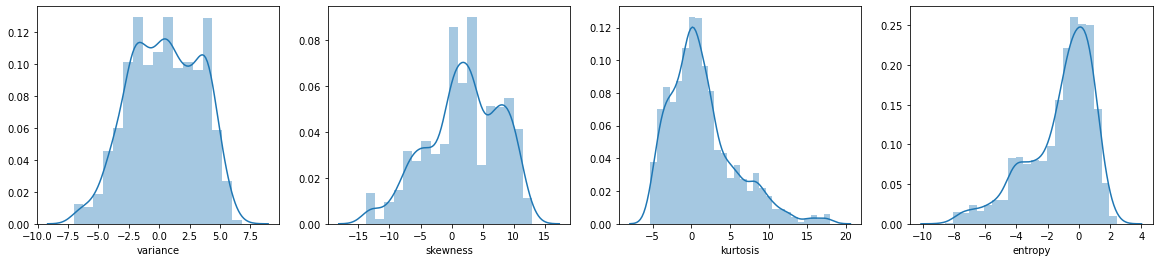

In [7]:
#Visualising the distribution of every attribute

fig,ax=plt.subplots(nrows=1 ,ncols=4)
sns.distplot(data['variance'],ax=ax[0])
sns.distplot(data['skewness'],ax=ax[1])
sns.distplot(data['kurtosis'],ax=ax[2])
sns.distplot(data['entropy'],ax=ax[3])
fig.set_figwidth(20)

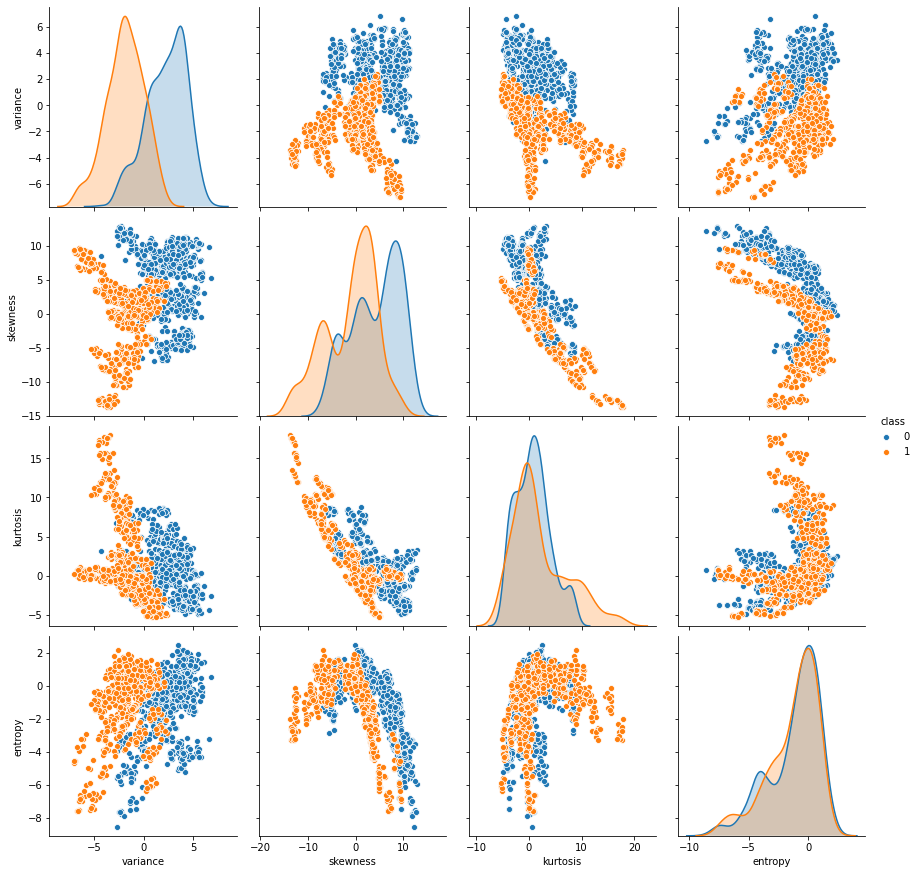

In [8]:
#Visualising and comparing all attributes

sns.pairplot(data, hue='class', size=3)

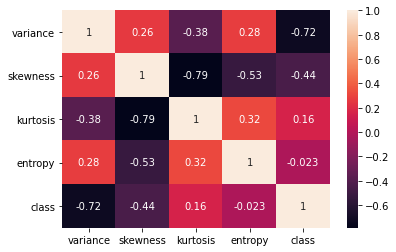

In [9]:
#Checking how the correlation is

sns.heatmap(data.corr(), annot = True)
plt.show()

## Data Pre-processing

In [10]:
#Spliting the dataset in independent and dependent variables

X = data.iloc[:, 0:4].values
y = data['class'].values

print(X.shape)
print(y.shape)

(1372, 4)
(1372,)


In [11]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)

In [12]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Fitting a model

### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

print(confusion_matrix(y_test,y_pred_logreg))
print(classification_report(y_test,y_pred_logreg))

[[150   9]
 [  0 116]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       159
           1       0.93      1.00      0.96       116

    accuracy                           0.97       275
   macro avg       0.96      0.97      0.97       275
weighted avg       0.97      0.97      0.97       275



In [14]:
#cross validation

from sklearn.model_selection import cross_val_score
print(cross_val_score(logreg, X_train, y_train, cv=5))

[0.98636364 0.99090909 0.98173516 0.99543379 0.97260274]


### Decision Tree Classifier

In [15]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)

y_pred_dec_tree = dec_tree.predict(X_test)

print(confusion_matrix(y_test,y_pred_dec_tree))
print(classification_report(y_test,y_pred_dec_tree))

[[158   1]
 [  3 113]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       159
           1       0.99      0.97      0.98       116

    accuracy                           0.99       275
   macro avg       0.99      0.98      0.99       275
weighted avg       0.99      0.99      0.99       275



In [16]:
#cross validation

print(cross_val_score(dec_tree, X_train, y_train, cv=5))

[0.99090909 0.98636364 0.99086758 0.98630137 0.98173516]


### Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 200, min_samples_leaf = 3, max_features = 0.5, n_jobs = -1)
rfc.fit(X_train, y_train)

y_pred_rfc = rfc.predict(X_test)

print(confusion_matrix(y_test,y_pred_rfc))
print(classification_report(y_test,y_pred_rfc))

[[158   1]
 [  0 116]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       159
           1       0.99      1.00      1.00       116

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [18]:
#cross validation

print(cross_val_score(rfc, X_train, y_train, cv=5))

[1.         0.99090909 1.         0.98173516 0.99086758]


The similar accuracy and cross validation scores for each model shows that the models are not overfitted. 

### Checking accuracy scores of test data

In [19]:
#Logistic Regression
acc_logreg = logreg.score(X_test, y_test)*100
print(acc_logreg)

96.72727272727273


In [20]:
#Decision Tree Classifier
acc_dec_tree = dec_tree.score(X_test, y_test)*100
print(acc_dec_tree)

98.54545454545455


In [21]:
#Random Forest Classifier
acc_rfc = rfc.score(X_test, y_test)*100
print(acc_rfc)

99.63636363636364


### Sorting according to the test data accuracy

In [22]:
models = pd.DataFrame({
'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
'Score': [acc_logreg, acc_dec_tree, acc_rfc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,99.636364
1,Decision Tree,98.545455
0,Logistic Regression,96.727273
